<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>


## Exporatory Data Analysis


### Dataset reference: https://www.kaggle.com/CooperUnion/anime-recommendations-database?fbclid=IwAR3sXr48_xQHp8NgF9AyXuVf0RGwTkFw8bfkRoXda6zix9rQsevpya8JDOM#rating.csv


### Context
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.


### Content

#### Anime.csv

**anime_id** - myanimelist.net's unique id identifying an anime.

**name** - full name of anime.

**genre** - comma separated list of genres for this anime.

**type** - movie, TV, OVA, etc.

**episodes** - how many episodes in this show. (1 if movie).

**rating** - average rating out of 10 for this anime.

**members** - number of community members that are in this anime's "group".

#### Rating.csv

**user_id** - non identifiable randomly generated user id.

**anime_id** - the anime that this user has rated.

**rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).




<div class="alert alert-block alert-info">
Some comments here 
</div>



# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib




importing Jupyter notebook from functions.ipynb


# Load data from files

In [2]:
RawData = pd.read_csv('../data/anime.csv')
OriginData = RawData.copy()

<div class="alert alert-block alert-info">
Some comments here 
</div>

# Data Descriptive 

#### View sample data

In [3]:
data_columns = RawData.columns
data_columns
RawData.sample(5)


,anime_id,name,genre,type,episodes,rating,members
8780,10539,Hato no Oyome-san,Comedy,TV,22,3.62,168
5334,33038,Nuwa Chengzhang Riji,"Comedy, Fantasy",TV,30,6.49,3106
10157,28693,Seisho Gensou Fu: Adam to Eve,Historical,Movie,1,6.00,61
245,3702,Detroit Metal City,"Comedy, Music",OVA,12,8.26,104893
11554,8339,Kachou no Koi,"Comedy, Romance, Yaoi",OVA,1,6.43,6890


#### Check null values

In [4]:
RawData.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### Drop null rows

In [5]:
RawData = RawData.dropna()


#### remove unknown data

In [6]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12017 non-null int64
name        12017 non-null object
genre       12017 non-null object
type        12017 non-null object
episodes    12017 non-null object
rating      12017 non-null float64
members     12017 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [7]:
RawData['episodes'].describe()

count     12017
unique      187
top           1
freq       5571
Name: episodes, dtype: object

In [8]:
RawData['episodes'].unique()


array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

<div class="alert alert-block alert-danger">
We saw that, there are some 'Unknow' values in the <b>episodes</b> feature.
Should we remove these rows from the dataset ?
Let's check.
</div>

#### Check and remove Unknown data from episodes


In [9]:
episodes_unknown = RawData[['anime_id','episodes','rating']].copy() 
episodes_unknown.sample(5)


,anime_id,episodes,rating
8188,31965,52,4.77
10377,21963,1,5.00
1179,2514,1,7.64
910,2214,17,7.77
6538,3095,2,6.07


In [10]:
episodes_unknown.loc[episodes_unknown['episodes'] !='Unknown', 'episodes'] = 1
episodes_unknown.loc[episodes_unknown['episodes'] =='Unknown', 'episodes'] = 0
episodes_unknown.head()


,anime_id,episodes,rating
0,32281,1,9.37
1,5114,1,9.26
2,28977,1,9.25
3,9253,1,9.17
4,9969,1,9.16


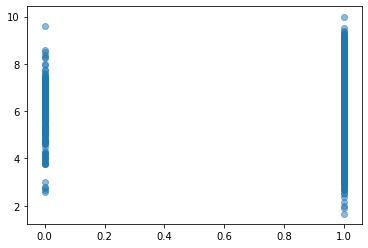

In [11]:
plt.scatter(episodes_unknown['episodes'],episodes_unknown['rating'] , alpha=0.5)

In [12]:
episodes_unknown['episodes'].describe()


count    12017.000000
mean         0.984439
std          0.123776
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: episodes, dtype: float64

<div class="alert alert-block alert-danger">
Based on the outputs of the <b>episodes</b> feature,
we saw that the unknow values (0) does not affect the range of the rating.
So we can remove known values in the <b>episodes</b> feature.  
</div>


#### Remove Unknown data from episodes


In [13]:
RawData = RawData[RawData['episodes']!='Unknown']
RawData.head()



,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Check and remove outliers

<div class="alert alert-block alert-info">
Check and remove outliers  
</div>

##### Check the members feature

In [14]:
RawData['members'].describe()


count    1.183000e+04
mean     1.851100e+04
std      5.537144e+04
min      1.200000e+01
25%      2.322500e+02
50%      1.589500e+03
75%      9.832000e+03
max      1.013917e+06
Name: members, dtype: float64

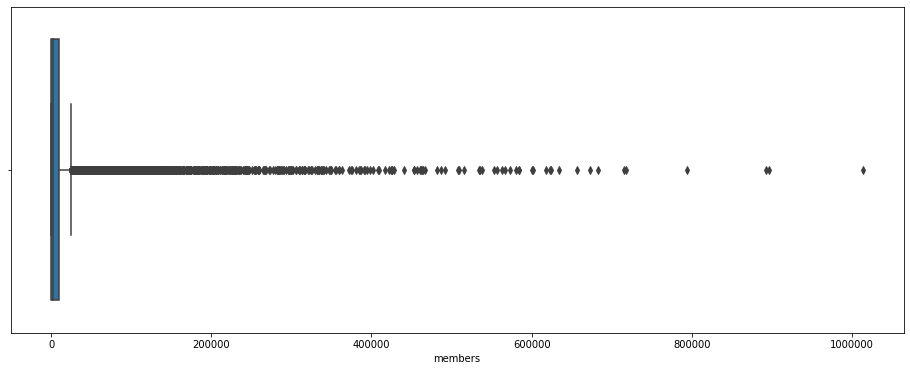

In [15]:
plt.figure(figsize=(16, 6))
members_box = sns.boxplot(x="members", 
                data=RawData)

Text(0.5, 1.0, 'Members Distribution')

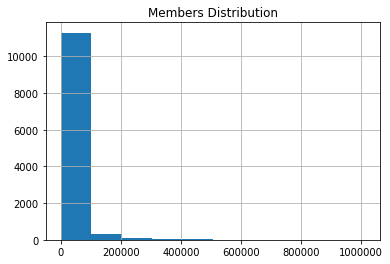

In [16]:
RawData.members.hist(bins=10)
plt.title("Members Distribution")


##### Check the members feature

In [17]:
RawData['episodes'] = RawData['episodes'].astype(int)


In [18]:
RawData['episodes'].describe()


count    11830.000000
mean        12.486729
std         47.097131
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

Text(0.5, 1.0, 'episodes Distribution')

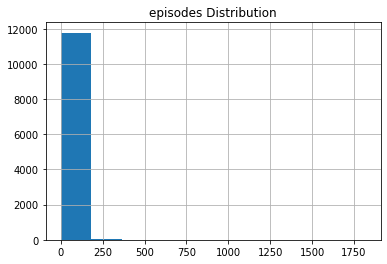

In [19]:
RawData.episodes.hist(bins=10)
plt.title("episodes Distribution")

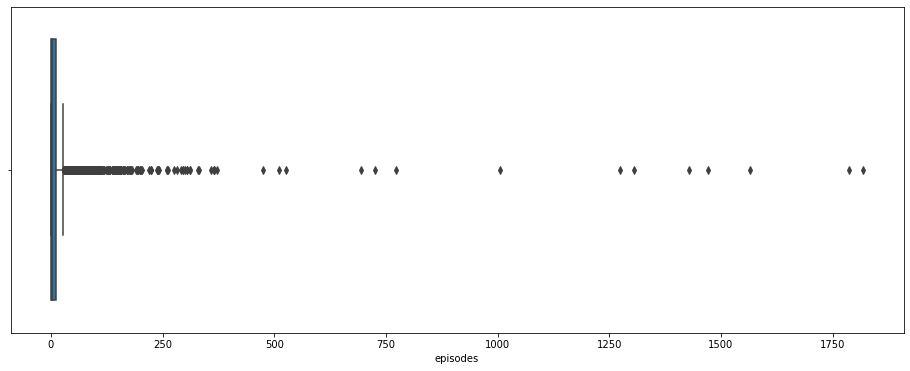

In [20]:
plt.figure(figsize=(16, 6))
episodes_box = sns.boxplot(x="episodes", 
                data=RawData)


##### Scatter plots - Relationships between the numerical varibles.

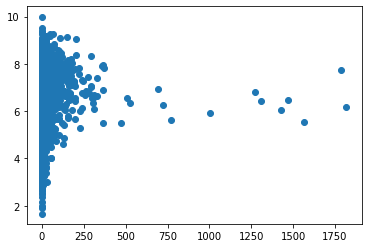

In [21]:
plt.scatter( RawData['episodes'], RawData['rating'], marker='o');


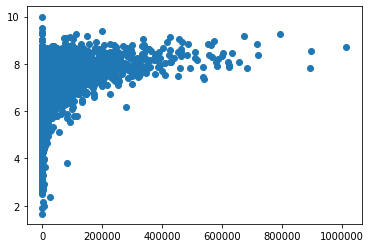

In [22]:
plt.scatter(RawData['members'], RawData['rating'],marker='o');



Text(0.5, 1.0, 'Rating Distribution')

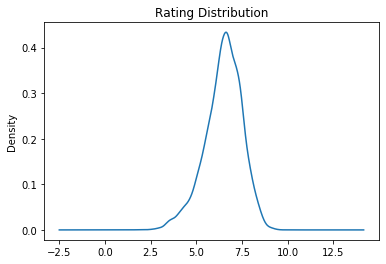

In [23]:
RawData.rating.plot(kind="kde")
plt.title("Rating Distribution")

In [24]:
RawData['rating'].describe()

count    11830.000000
mean         6.484609
std          1.019147
min          1.670000
25%          5.892500
50%          6.570000
75%          7.190000
max         10.000000
Name: rating, dtype: float64

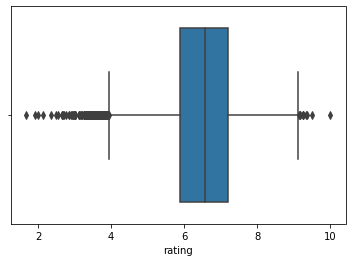

In [25]:
ax = sns.boxplot(x="rating", 
                data=RawData)


In [26]:
#Add a new column rating class 
RawData['Class']=1#RawData['rating']
RawData.sample(5)

,anime_id,name,genre,type,episodes,rating,members,Class
8019,16822,Uju Heukgisa,"Action, Sci-Fi, Space",Movie,1,3.87,224,1
7082,1611,Galerians: Rion,"Adventure, Drama, Horror, Military, Mystery, P...",OVA,3,5.74,2002,1
5537,2024,Yoshimune,"Comedy, Historical",TV,24,6.43,393,1
3959,7329,Tottoko Hamtarou Movie 1: Ham-Ham Land Daibouken,"Adventure, Comedy, Kids",Movie,1,6.84,1472,1
8468,26301,Donguri to Yamaneko (1995),"Demons, Drama, Kids",OVA,1,5.00,54,1


In [27]:
# 1: High
# or 0: Low based on rating
RawData.loc[RawData['rating'] >= RawData['rating'].mean(), 'Class'] = 1
RawData.loc[RawData['rating'] < RawData['rating'].mean(), 'Class'] = 0
RawData.sample(5)

,anime_id,name,genre,type,episodes,rating,members,Class
1708,15225,Hentai Ouji to Warawanai Neko.,"Comedy, Harem, Romance, School, Seinen, Supern...",TV,12,7.46,201735,1
2893,6178,Pokemon Diamond &amp; Pearl: Arceus Choukoku n...,"Action, Adventure, Comedy, Drama, Fantasy, Kids",Movie,1,7.14,29668,1
10415,9906,Sue Cat,"Adventure, Music, Shoujo",TV,40,6.27,116,0
9352,22465,KutsuDaru.,"Fantasy, Kids, School, Slice of Life",TV,48,6.03,339,0
7765,5838,Furudera no Obake-soudou,"Action, Adventure",Movie,1,5.04,531,0


In [28]:
RawData['Class'].describe()

count    11830.000000
mean         0.540490
std          0.498379
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Class, dtype: float64

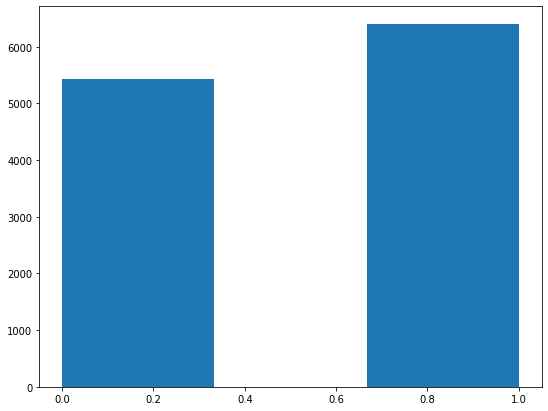

In [29]:
RawData['Class'].hist(bins=3,figsize=(9,7),grid=False)


In [30]:
#Split genre values into rows
NewData = pd.DataFrame(RawData.genre.str.split(',').tolist(), index=[RawData.anime_id,RawData.type,RawData.episodes,RawData.rating,RawData.members,RawData.Class]).stack()
NewData.head()

anime_id  type   episodes  rating  members  Class   
32281     Movie  1         9.37    200630   1      0            Drama
                                                   1          Romance
                                                   2           School
                                                   3     Supernatural
5114      TV     64        9.26    793665   1      0           Action
dtype: object

In [31]:
NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
NewData.head()

,anime_id,type,episodes,rating,members,Class,genre
0,32281,Movie,1,9.37,200630,1,Drama
1,32281,Movie,1,9.37,200630,1,Romance
2,32281,Movie,1,9.37,200630,1,School
3,32281,Movie,1,9.37,200630,1,Supernatural
4,5114,TV,64,9.26,793665,1,Action


In [32]:
#Check number of values in the genre feature [82 uniques type]
#So if we do one-hot-encoder, we will have 82 columns
NewData['genre'].describe()


count      35201
unique        82
top       Comedy
freq        3069
Name: genre, dtype: object

In [33]:
#ax = NewData.plot.bar(x='genre', y='rating', rot=0)
#ax = NewData.plot.bar(x='type', y='rating', rot=0)



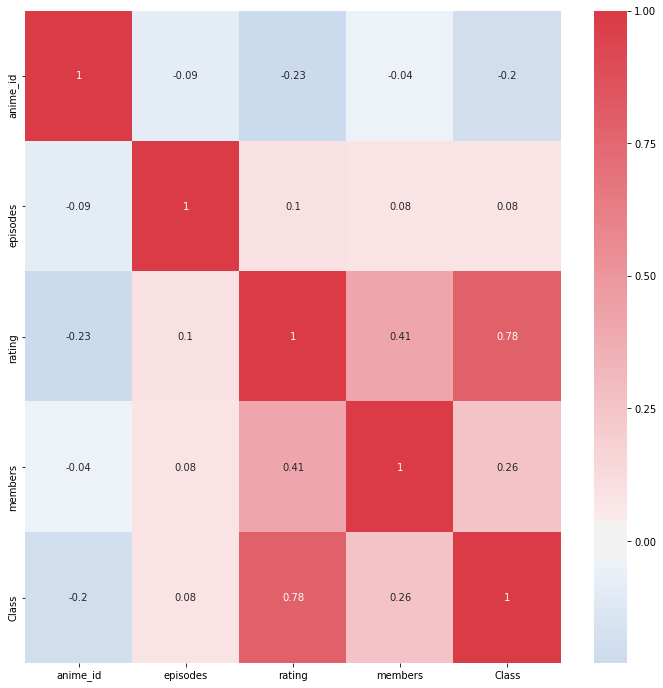

In [34]:
cor_matrix = NewData.corr().round(2)
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

#Visualization

Text(0.5, 1.0, 'Rating Distribution')

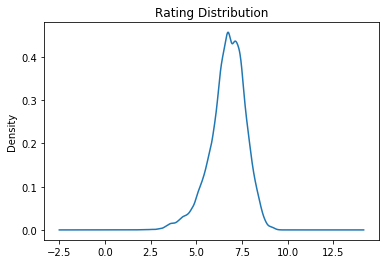

In [35]:
NewData.rating.plot(kind="kde")
plt.title("Rating Distribution")

In [36]:
NewData['rating'].describe()

count    35201.000000
mean         6.722398
std          0.962320
min          1.670000
25%          6.200000
50%          6.800000
75%          7.380000
max         10.000000
Name: rating, dtype: float64

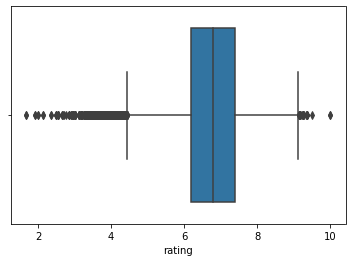

In [37]:
ax = sns.boxplot(x="rating", 
                data=NewData)


#### Encoding Categorical Data

In [38]:
#Check number of values in the type feature [6 uniques type]
#So if we do one-hot-encoder, we will have 6 columns
RawData['type'].describe()


count     11830
unique        6
top          TV
freq       3568
Name: type, dtype: object

In [39]:
#Encode type feature: 6 unique values
NewData_Encode = myLib.myEncode(NewData,['type'])
NewData_Encode.head()


,anime_id,episodes,rating,members,Class,genre,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,1,9.37,200630,1,Drama,1,0,0,0,0,0
1,32281,1,9.37,200630,1,Romance,1,0,0,0,0,0
2,32281,1,9.37,200630,1,School,1,0,0,0,0,0
3,32281,1,9.37,200630,1,Supernatural,1,0,0,0,0,0
4,5114,64,9.26,793665,1,Action,0,0,0,0,0,1


In [40]:
#Encode genre feature: 82 unique values
NewData_Encode = myLib.myEncode(NewData_Encode,['genre'])
NewData_Encode.head()


,anime_id,episodes,rating,members,Class,type_Movie,type_Music,type_ONA,type_OVA,type_Special,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,32281,1,9.37,200630,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32281,1,9.37,200630,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32281,1,9.37,200630,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32281,1,9.37,200630,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5114,64,9.26,793665,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Drop anmie_id,rating,Class
NewData_Encode = NewData_Encode.drop(['rating'],axis=1)
NewData_Encode = NewData_Encode.drop(columns=['anime_id'])
Y_Data = NewData_Encode['Class']
NewData_Encode = NewData_Encode.drop(columns=['Class'])
NewData_Encode.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [43]:
X_Data = NewData_Encode
X_Data.head()


,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalize  Data

In [44]:
Normalized_Data = myLib.myNormalize(X_Data)
Normalized_Data.head()


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### PCA

In [45]:
n_components=10
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786509,-0.420835,0.004927,-0.078336,-0.052012,-0.061995,0.010630,-0.075945,-0.028671
1,-0.284842,0.763990,-0.412009,-0.010896,-0.109717,-0.086827,-0.091722,0.051505,-0.176191,-0.037203
2,-0.284838,0.767909,-0.395564,-0.007459,-0.091594,-0.058002,-0.057865,0.032003,-0.084966,-0.022775
3,-0.291600,0.777174,-0.408318,0.000240,-0.081227,-0.049221,-0.061528,0.018855,-0.070101,-0.032048
4,0.732145,-0.153155,-0.102203,-0.458219,0.816847,0.046180,0.015035,-0.065031,0.014999,-0.004718


In [46]:
NewData_Encode.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Clean_Data = myLib.myCleanAndTransformData(OriginData)
Clean_Data.head()


,members,Class,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,200630,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200630,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200630,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200630,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,793665,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Clean_Data = Clean_Data[Clean_Data['members']<200000]
Clean_Data.head()

,members,Class,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
11,114262,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,114262,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,114262,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,114262,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,114262,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
